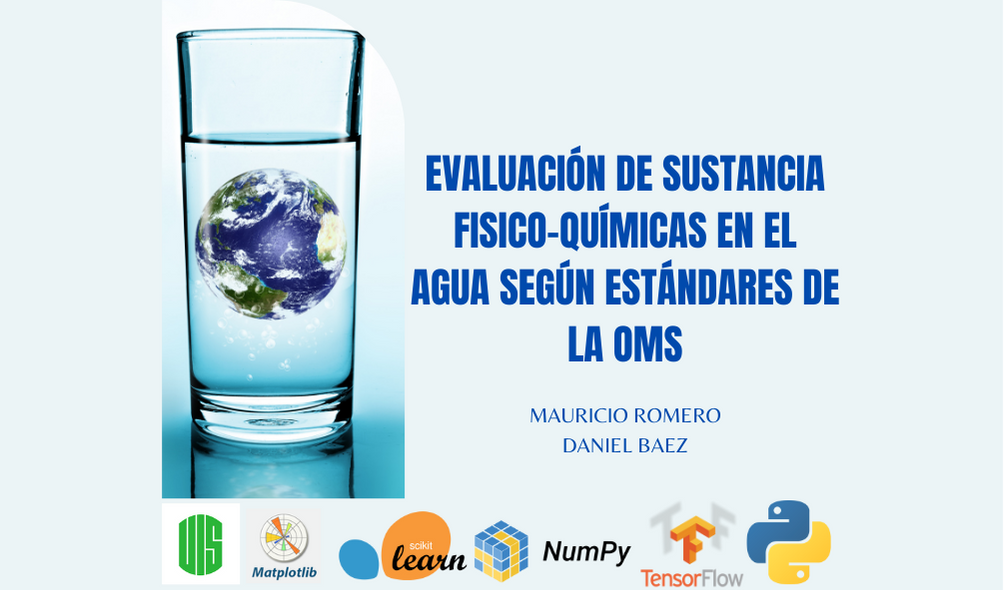

In [6]:
#@title **Banner** { display-mode: "form" }
from IPython.display import Image
Image('/content/drive/My Drive/final/data/foto.png', width=1004, height=590)

In [7]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "final" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/final


In [8]:
#@title 2. **CARGANDO LIBRERIAS** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Pruebas con Dataset original

In [9]:
d_orig =  pd.read_csv("data/waterQuality_original.csv")
d_orig

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


###Dataset con los valores de interes

In [10]:
valores_muestra_original = d_orig.drop(['ammonia','bacteria', 'viruses'], axis=1)
print(valores_muestra_original.shape)
valores_muestra_original.head(7999)

(7999, 18)


,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


**Descripcion**:
Detalles del dataset:

- aluminium - peligroso para valores mayores a 2.8
- arsenic - peligroso para valores mayores a 0.01
- barium - peligroso para valores mayores a 2
- cadmium - peligroso para valores mayores a 0.005
- chloramine - peligroso para valores mayores a 4
- chromium - peligroso para valores mayores a 0.1
- copper - peligroso para valores mayores a 1.3
- flouride - peligroso para valores mayores a 1.5
- lead - peligroso para valores mayores a 0.015
- nitrates - peligroso para valores mayores a 10
- nitrites - peligroso para valores mayores a 1
- mercury - peligroso para valores mayores a 0.002
- perchlorate - peligroso para valores mayores a 56
- radium - peligroso para valores mayores a 5
- selenium - peligroso para valores mayores a 0.5
- silver - peligroso para valores mayores a 0.1
- uranium - peligroso para valores mayores a 0.3
- is_safe - atributo de clases {0 - no seguro, 1 - seguro}


###GaussianNB

In [11]:
data = valores_muestra_original[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','radium','selenium','silver','uranium']]
data_y = valores_muestra_original['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)
est = GaussianNB()
est.fit(X_train, y_train)
print("Train_Accuracy:  ", accuracy_score(est.predict(X_train), y_train))
print("Accuracy:  ",accuracy_score(est.predict(X_test), y_test))
gauss = accuracy_score(est.predict(X_test), y_test)

Train_Accuracy:   0.8370057821534614
Accuracy:   0.989375


###Decision Tree classifier

In [12]:
data = valores_muestra_original[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','radium','selenium','silver','uranium']]
data_y = valores_muestra_original['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

max_d= [1,2,3,4,6,8,10]
train_dt=[]
a_dt=[]

for md in max_d:
  est = DecisionTreeClassifier(max_depth = md)
  est.fit(X_train, y_train)
  y_predic = est.predict(X_test)
  t1 = accuracy_score(est.predict(X_train), y_train)
  a1 = accuracy_score(y_predic,y_test)
  a_dt.append(a1)
  train_dt.append(t1)

print("Accuracy_DecisionTree:  ",a_dt)
tree = a_dt[1]

Accuracy_DecisionTree:   [0.989375, 0.989375, 0.989375, 0.9875, 0.960625, 0.984375, 0.956875]


###Decision Tree classifier grafica train_accuracy

Train_Accuracy:   [0.8596655727457415, 0.9007657446476012, 0.9282700421940928, 0.9329582747304266, 0.952336302547273, 0.9699953117674637, 0.9821847163619315] 



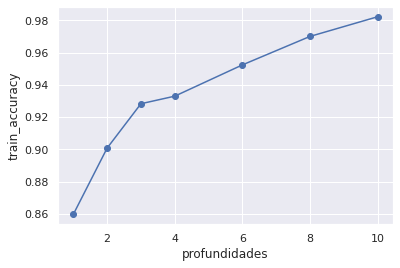

In [13]:
print("Train_Accuracy:  ", train_dt, "\n")
fig, ax = plt.subplots()
ax.scatter(x = [max_d], y = [train_dt])
ax.plot(max_d, train_dt)
plt.xlabel('profundidades')
plt.ylabel('train_accuracy')
plt.show()

###Random Forest

In [14]:
data = valores_muestra_original[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','radium','selenium','silver','uranium']]
data_y = valores_muestra_original['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

max_d= [2,3,4,7,9,10]
train_rf=[]
a_rf=[]
n_es=[50,100,150,200,250,300]

for md,e in zip(max_d,n_es):
  
  est = RandomForestClassifier(max_depth=md, n_estimators=e, random_state=21)
  est.fit(X_train,y_train)
  y_predic= est.predict(X_test)
  a1 = accuracy_score(y_predic,y_test)
  t1 = accuracy_score(est.predict(X_train), y_train)
  a_rf.append(a1)
  train_rf.append(t1)
print("Accuracy_Randomforest:  ",a_rf)
forest = a_rf[2]

Accuracy_Randomforest:   [0.989375, 0.989375, 0.989375, 0.989375, 0.989375, 0.989375]


###Random Forest grafica train_accuracy

Accurarcy_train:   [0.8596655727457415, 0.8612283169245195, 0.928895139865604, 0.948585716518206, 0.967494921081419, 0.9737458977965308] 



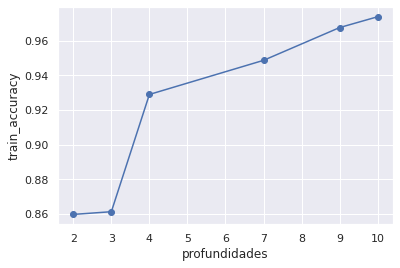

In [15]:
print("Accurarcy_train:  ",train_rf, "\n")
fig, ax = plt.subplots()
ax.scatter(x = [max_d], y = [train_rf])
ax.plot(max_d, train_rf)
plt.xlabel('profundidades')
plt.ylabel('train_accuracy')
plt.show()

###SVM

In [16]:
data = valores_muestra_original[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','radium','selenium','silver','uranium']]
data_y = valores_muestra_original['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

kernels =   ['sigmoid', 'linear', 'poly', 'rbf']
a_svc = []
train = []

for kernel in kernels:
      est = SVC(kernel=kernel,random_state=21)
      est.fit(X_train,y_train)
      y_predic = est.predict(X_test)
      t1 = accuracy_score(est.predict(X_train), y_train)
      a = accuracy_score(y_predic,y_test)
      a_svc.append(a)
      train.append(t1)
print("Accuracy_svc:  ",a_svc)
svm = a_svc[1]

Accuracy_svc:   [0.91375, 0.989375, 0.989375, 0.989375]


###SVM grafica train_accuracy

Accurarcy_train:   [0.7387091733083294, 0.882794186591655, 0.8596655727457415, 0.8596655727457415] 



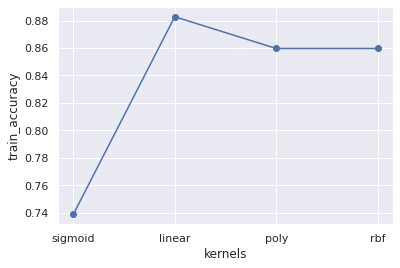

In [17]:
print("Accurarcy_train:  ",train, "\n")
fig, ax = plt.subplots()
ax.scatter(x = kernels, y = [train])
ax.plot(kernels, train)
plt.xlabel('kernels')
plt.ylabel('train_accuracy')
plt.show()

###Comparación de los diversos estimadores

GaussianNB: 0.989375 Decision_Tree: 0.989375 Random_Fores: 0.989375 SVM: 0.989375 



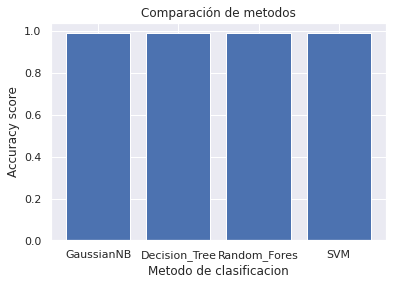

In [18]:
print('GaussianNB:', gauss,'Decision_Tree:',tree, 'Random_Fores:', forest,'SVM:',svm, '\n')
eje_x = ['GaussianNB', 'Decision_Tree', 'Random_Fores', 'SVM']
eje_y = [gauss,tree,forest,svm]
 
plt.bar(eje_x, eje_y)
 
plt.ylabel('Accuracy score')
plt.xlabel('Metodo de clasificacion')
plt.title('Comparación de metodos')
 
plt.show()

#Carga del Dataset Modificado

In [19]:
d =  pd.read_csv("data/waterQuality1.csv")
print(d.shape)


(7999, 19)


###Dataset con los valores de interes

In [20]:
valores_muestra = d.drop(['Unnamed: 0', 'ammonia', 'radium'], axis=1)
print(valores_muestra.shape)
valores_muestra.head()

(7999, 16)


,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,lead,nitrates,nitrites,mercury,perchlorate,selenium,silver,uranium
0,0.00165,0.00004,0.00285,0.007,0.00035,0.00083,0.00017,0.00005,0.000054,0.01608,0.00113,0.000007,0.03775,0.00008,0.00034,0.00002
1,0.00232,0.00001,0.00331,0.002,0.00528,0.00068,0.00066,0.00090,0.000100,0.00201,0.00193,0.000003,0.03226,0.00008,0.00027,0.00005
2,0.00101,0.00004,0.00058,0.008,0.00424,0.00053,0.00002,0.00099,0.000078,0.01416,0.00111,0.000006,0.05028,0.00007,0.00044,0.00001
3,0.00136,0.00004,0.00296,0.001,0.00723,0.00003,0.00166,0.00108,0.000016,0.00141,0.00129,0.000004,0.00912,0.00002,0.00045,0.00005
4,0.00092,0.00003,0.00020,0.006,0.00267,0.00069,0.00057,0.00061,0.000117,0.00674,0.00111,0.000003,0.01690,0.00002,0.00006,0.00002


###Creacion del groun-truth con las reglas determinadas

In [21]:
#condicional para encontrar que muestra es segura y cual no
# 1 -> seguro   |  0 -> no seguro

valores_muestra['is_safe']= np.where(  (valores_muestra['aluminium'] <= 0.1) & (valores_muestra['arsenic'] <= 0.01) & (valores_muestra['barium'] <= 1.3) 
& (valores_muestra['cadmium'] <= 0.003) & (valores_muestra['chloramine'] <= 3) & (valores_muestra['chromium'] <= 0.05) & (valores_muestra['copper'] <= 2)
& (valores_muestra['flouride'] <= 1.5) & (valores_muestra['lead'] <= 0.01) & (valores_muestra['nitrates'] <= 50) & (valores_muestra['nitrites'] <= 0.5)
& (valores_muestra['mercury'] <= 0.006) & (valores_muestra['perchlorate'] <= 0.007) & (valores_muestra['selenium'] <= 0.01) & (valores_muestra['silver'] <= 0.05)
& (valores_muestra['uranium'] <= 1.4)  , 1 , 0 )

valores_muestra


,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,lead,nitrates,nitrites,mercury,perchlorate,selenium,silver,uranium,is_safe
0,0.00165,0.00004,0.00285,0.007,0.00035,0.00083,0.00017,0.00005,0.000054,0.01608,0.00113,0.000007,0.03775,0.00008,0.00034,0.00002,0
1,0.00232,0.00001,0.00331,0.002,0.00528,0.00068,0.00066,0.00090,0.000100,0.00201,0.00193,0.000003,0.03226,0.00008,0.00027,0.00005,0
2,0.00101,0.00004,0.00058,0.008,0.00424,0.00053,0.00002,0.00099,0.000078,0.01416,0.00111,0.000006,0.05028,0.00007,0.00044,0.00001,0
3,0.00136,0.00004,0.00296,0.001,0.00723,0.00003,0.00166,0.00108,0.000016,0.00141,0.00129,0.000004,0.00912,0.00002,0.00045,0.00005,0
4,0.00092,0.00003,0.00020,0.006,0.00267,0.00069,0.00057,0.00061,0.000117,0.00674,0.00111,0.000003,0.01690,0.00002,0.00006,0.00002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.00005,0.00000,0.00195,0.040,0.00010,0.00003,0.00003,0.00137,0.000197,0.01429,0.00100,0.000005,0.00357,0.00009,0.00006,0.00003,0
7995,0.00005,0.00002,0.00059,0.010,0.00045,0.00002,0.00002,0.00148,0.000031,0.01027,0.00100,0.000001,0.00148,0.00009,0.00010,0.00008,0
7996,0.00009,0.00000,0.00061,0.030,0.00005,0.00005,0.00002,0.00091,0.000182,0.01592,0.00100,0.000000,0.00135,0.00000,0.00004,0.00005,0
7997,0.00001,0.00001,0.00200,0.000,0.00200,0.00000,0.00009,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,1


**Descripcion**:
Detalles del dataset:

- aluminium - peligroso para valores mayores a 0.1 mg/l
- arsenic - peligroso para valores mayores a 0.01 mg/l
- barium - peligroso para valores mayores a 1.3 mg/l
- cadmium - peligroso para valores mayores a 0.003 mg/l
- chloramine - peligroso para valores mayores a 3 mg/l
- chromium - peligroso para valores mayores a 0.05 mg/l
- copper - peligroso para valores mayores a 2 mg/l
- flouride - peligroso para valores mayores a 1.5 mg/l
- lead - peligroso para valores mayores a 0.01 mg/l
- nitrates - peligroso para valores mayores a 50 mg/l
- nitrites - peligroso para valores mayores a 0.5 mg/l
- mercury - peligroso para valores mayores a 0.006 mg/l
- perchlorate - peligroso para valores mayores a 0.007 mg/l
- selenium - peligroso para valores mayores a 0.01 mg/l
- silver - peligroso para valores mayores a 0.05 mg/l
- uranium - peligroso para valores mayores a 1.4 mg/l
- is_safe - atributo de clases {0 - no seguro, 1 - seguro}


###Filtro para observar los valores que son aceptados, según los estándares de la OMS

In [22]:
# muestras con puntaje seguro

valores_seguros = valores_muestra.loc[(valores_muestra['aluminium'] <= 0.1) & (valores_muestra['arsenic'] <= 0.01) & (valores_muestra['barium'] <= 1.3) 
& (valores_muestra['cadmium'] <= 0.003) & (valores_muestra['chloramine'] <= 3) & (valores_muestra['chromium'] <= 0.05) & (valores_muestra['copper'] <= 2)
& (valores_muestra['flouride'] <= 1.5) & (valores_muestra['lead'] <= 0.01) & (valores_muestra['nitrates'] <= 50) & (valores_muestra['nitrites'] <= 0.5)
& (valores_muestra['mercury'] <= 0.006) & (valores_muestra['perchlorate'] <= 0.007) & (valores_muestra['selenium'] <= 0.01) & (valores_muestra['silver'] <= 0.05)
& (valores_muestra['uranium'] <= 1.4)]
valores_seguros

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,lead,nitrates,nitrites,mercury,perchlorate,selenium,silver,uranium,is_safe
16,0.00347,0.000020,0.00006,0.001,0.00529,0.00047,0.00108,0.00143,0.000080,0.00191,0.00120,0.000008,0.00018,0.00006,0.00012,0.00008,1
53,0.00432,0.000040,0.00198,0.001,0.00797,0.00032,0.00198,0.00066,0.000101,0.00722,0.00169,0.000009,0.00520,0.00004,0.00012,0.00001,1
70,0.00308,0.000050,0.00224,0.003,0.00477,0.00003,0.00111,0.00036,0.000189,0.01625,0.00156,0.000010,0.00377,0.00001,0.00021,0.00005,1
106,0.00162,0.000010,0.00146,0.001,0.00307,0.00011,0.00005,0.00121,0.000015,0.00172,0.00102,0.000001,0.00347,0.00009,0.00047,0.00001,1
126,0.00212,0.000001,0.00057,0.003,0.00430,0.00082,0.00157,0.00043,0.000089,0.01477,0.00197,0.000005,0.00091,0.00003,0.00020,0.00003,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,0.00008,0.000010,0.00052,0.000,0.00003,0.00007,0.00007,0.00026,0.000142,0.00294,0.00224,0.000006,0.00130,0.00000,0.00003,0.00000,1
7877,0.00006,0.000080,0.00100,0.000,0.00019,0.00007,0.00002,0.00104,0.000043,0.00265,0.00217,0.000002,0.00110,0.00008,0.00008,0.00000,1
7891,0.00005,0.000090,0.00020,0.000,0.00026,0.00009,0.00005,0.00030,0.000022,0.00776,0.00185,0.000009,0.00124,0.00009,0.00004,0.00006,1
7896,0.00010,0.000020,0.00024,0.000,0.00017,0.00001,0.00009,0.00086,0.000191,0.01966,0.00186,0.000007,0.00077,0.00000,0.00005,0.00002,1


###GaussianNB

In [23]:
data = valores_muestra[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                        'selenium','silver','uranium']]
data_y = valores_muestra['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size=0.2, shuffle=False)
est = GaussianNB()
est.fit(X_train, y_train)
print("Accuracy_Train:  ", accuracy_score(est.predict(X_train), y_train))
print("Accuracy  ", accuracy_score(est.predict(X_test), y_test))
gauss1 = accuracy_score(est.predict(X_test), y_test)

Accuracy_Train:   0.9329582747304266
Accuracy   0.990625


###Decision Tree classifier

In [24]:
data = valores_muestra[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = valores_muestra['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.1, shuffle=False)
max_d= [1,2,3,4,6,8,10]
train_dt=[]
a_dt1=[]

for md in max_d:
  est = DecisionTreeClassifier(max_depth=md)
  est.fit(X_train,y_train)
  y_predic = est.predict(X_test)
  t1 = accuracy_score(est.predict(X_train), y_train)
  a1 = accuracy_score(y_predic,y_test)
  a_dt1.append(a1)
  train_dt.append(t1)

print("Accuracy_DecisionTree:  ",a_dt1)
tree1 = a_dt1[0]

Accuracy_DecisionTree:   [0.9875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


###Decision Tree classifier grafica train_accuracy

Train_Accuracy:   [0.9806917627448257, 0.9863869981941936, 1.0, 1.0, 1.0, 1.0, 1.0] 



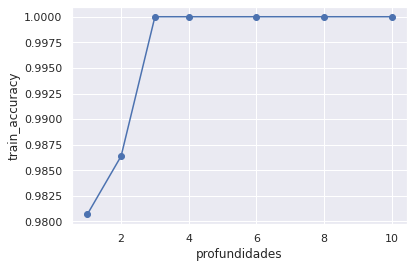

In [25]:
print("Train_Accuracy:  ", train_dt, "\n")
fig, ax = plt.subplots()
ax.scatter(x = [max_d], y = [train_dt])
ax.plot(max_d, train_dt)
plt.xlabel('profundidades')
plt.ylabel('train_accuracy')
plt.show()

###Random Forest

In [26]:
data = valores_muestra[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = valores_muestra['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.1, shuffle=False)

max_d= [2,3,4,7,9,10]
n_es=[50,100,150,200,250,300]
train_rf=[]
a_rf1=[]

for md,e in zip(max_d,n_es):
  est = RandomForestClassifier(max_depth=md, n_estimators=e,random_state=21)
  est.fit(X_train,y_train)
  y_predic= est.predict(X_test)
  a1 = accuracy_score(y_predic,y_test)
  t1 = accuracy_score(est.predict(X_train), y_train)
  a_rf1.append(a1)
  train_rf.append(t1)
print("Accuracy_Randomforest:  ",a_rf1)
forest1 = a_rf1[0]

Accuracy_Randomforest:   [0.95, 0.995, 1.0, 1.0, 1.0, 1.0]


###Random Forest grafica train_accuracy

Accurarcy_train:   [0.966106403667176, 0.9859702736491179, 0.9866648145575775, 1.0, 1.0, 1.0] 



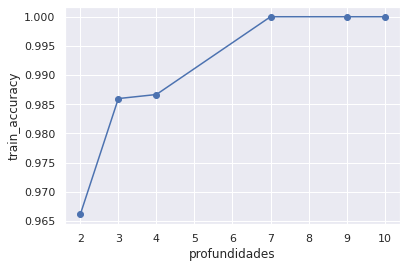

In [27]:
print("Accurarcy_train:  ",train_rf, "\n")
fig, ax = plt.subplots()
ax.scatter(x = [max_d], y = [train_rf])
ax.plot(max_d, train_rf)
plt.xlabel('profundidades')
plt.ylabel('train_accuracy')
plt.show()

###SVM

In [28]:
data = valores_muestra[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = valores_muestra['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

kernels =   ['sigmoid', 'linear', 'poly', 'rbf']
a_svc1 = []
train = []

for kernel in kernels:
      est = SVC(kernel=kernel,random_state=21)
      est.fit(X_train,y_train)
      y_predic = est.predict(X_test)
      t1 = accuracy_score(est.predict(X_train), y_train)
      a = accuracy_score(y_predic,y_test)
      a_svc1.append(a)
      train.append(t1)
print("Accuracy_svc:  ",a_svc1)
svm1 = a_svc1[1]

Accuracy_svc:   [0.9975, 0.95625, 0.95625, 0.998125]


###SVM grafica train_accuracy

Accurarcy_train:   [0.9903109860915769, 0.9665572745741522, 0.9665572745741522, 0.9915611814345991] 



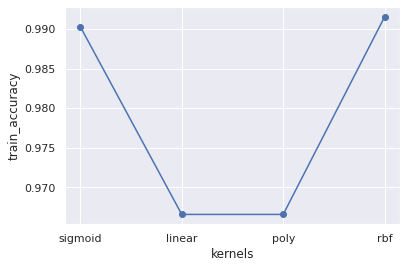

In [30]:
print("Accurarcy_train:  ",train, "\n")
fig, ax = plt.subplots()
ax.scatter(x = kernels, y = [train])
ax.plot(kernels, train)
plt.xlabel('kernels')
plt.ylabel('train_accuracy')
plt.show()

###Comparación de los diversos estimadores

GaussianNB: 0.990625 Decision_Tree: 0.9875 Random_Forest: 0.95 SVM: 0.95625 



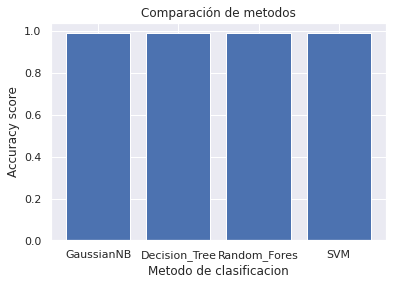

In [31]:
print('GaussianNB:', gauss1,'Decision_Tree:',tree1, 'Random_Forest:', forest1,'SVM:',svm1, '\n')
eje_x = ['GaussianNB', 'Decision_Tree', 'Random_Fores', 'SVM']
eje_y = [gauss,tree,forest,svm]
 
plt.bar(eje_x, eje_y)
 
plt.ylabel('Accuracy score')
plt.xlabel('Metodo de clasificacion')
plt.title('Comparación de metodos')
 
plt.show()

#Carga del Dataset Modificado sin desbalance

In [32]:
valores_muestra

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,lead,nitrates,nitrites,mercury,perchlorate,selenium,silver,uranium,is_safe
0,0.00165,0.00004,0.00285,0.007,0.00035,0.00083,0.00017,0.00005,0.000054,0.01608,0.00113,0.000007,0.03775,0.00008,0.00034,0.00002,0
1,0.00232,0.00001,0.00331,0.002,0.00528,0.00068,0.00066,0.00090,0.000100,0.00201,0.00193,0.000003,0.03226,0.00008,0.00027,0.00005,0
2,0.00101,0.00004,0.00058,0.008,0.00424,0.00053,0.00002,0.00099,0.000078,0.01416,0.00111,0.000006,0.05028,0.00007,0.00044,0.00001,0
3,0.00136,0.00004,0.00296,0.001,0.00723,0.00003,0.00166,0.00108,0.000016,0.00141,0.00129,0.000004,0.00912,0.00002,0.00045,0.00005,0
4,0.00092,0.00003,0.00020,0.006,0.00267,0.00069,0.00057,0.00061,0.000117,0.00674,0.00111,0.000003,0.01690,0.00002,0.00006,0.00002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.00005,0.00000,0.00195,0.040,0.00010,0.00003,0.00003,0.00137,0.000197,0.01429,0.00100,0.000005,0.00357,0.00009,0.00006,0.00003,0
7995,0.00005,0.00002,0.00059,0.010,0.00045,0.00002,0.00002,0.00148,0.000031,0.01027,0.00100,0.000001,0.00148,0.00009,0.00010,0.00008,0
7996,0.00009,0.00000,0.00061,0.030,0.00005,0.00005,0.00002,0.00091,0.000182,0.01592,0.00100,0.000000,0.00135,0.00000,0.00004,0.00005,0
7997,0.00001,0.00001,0.00200,0.000,0.00200,0.00000,0.00009,0.00000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,1


###Dataset Balanceado

In [33]:
valores_no_seguros = valores_muestra[valores_muestra['is_safe'] == 0].sample(n=284)
dataset_balanceado = pd.concat([valores_no_seguros, valores_seguros])
dataset_balanceado

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,lead,nitrates,nitrites,mercury,perchlorate,selenium,silver,uranium,is_safe
7562,0.00004,0.00004,0.00015,0.07,0.00003,0.00007,0.00104,0.00009,0.000151,0.01753,0.00184,0.000006,0.00169,0.00007,0.00009,0.00005,0
5313,0.00002,0.00003,0.00010,0.02,0.00020,0.00009,0.00133,0.00107,0.000099,0.00909,0.00098,0.000009,0.00726,0.00009,0.00006,0.00009,0
3474,0.00001,0.00017,0.00340,0.01,0.00353,0.00076,0.00007,0.00004,0.000001,0.00211,0.00204,0.000003,0.01602,0.00007,0.00033,0.00006,0
1497,0.00006,0.00077,0.00406,0.09,0.00679,0.00048,0.00113,0.00143,0.000152,0.00720,0.00172,0.000005,0.03164,0.00005,0.00008,0.00005,0
7846,0.00000,0.00001,0.00041,0.05,0.00004,0.00005,0.00005,0.00143,0.000089,0.00462,0.00134,0.000004,0.00152,0.00003,0.00008,0.00004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7854,0.00008,0.00001,0.00052,0.00,0.00003,0.00007,0.00007,0.00026,0.000142,0.00294,0.00224,0.000006,0.00130,0.00000,0.00003,0.00000,1
7877,0.00006,0.00008,0.00100,0.00,0.00019,0.00007,0.00002,0.00104,0.000043,0.00265,0.00217,0.000002,0.00110,0.00008,0.00008,0.00000,1
7891,0.00005,0.00009,0.00020,0.00,0.00026,0.00009,0.00005,0.00030,0.000022,0.00776,0.00185,0.000009,0.00124,0.00009,0.00004,0.00006,1
7896,0.00010,0.00002,0.00024,0.00,0.00017,0.00001,0.00009,0.00086,0.000191,0.01966,0.00186,0.000007,0.00077,0.00000,0.00005,0.00002,1


###GaussianNB

In [34]:
data = dataset_balanceado[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = dataset_balanceado['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)
est = GaussianNB()
est.fit(X_train, y_train)
print("Train_Accuracy:  ", accuracy_score(est.predict(X_train), y_train))
print("Accuracy:  ", accuracy_score(est.predict(X_test), y_test))
gauss = accuracy_score(est.predict(X_test), y_test)

Train_Accuracy:   0.9823788546255506
Accuracy:   1.0


###Decision Tree classifier

In [35]:
data = dataset_balanceado[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = dataset_balanceado['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

max_d= [1,2,3,4,6,8,10]
train_dt=[]
a_dt=[]

for md in max_d:
  est = DecisionTreeClassifier(max_depth = md)
  est.fit(X_train, y_train)
  y_predic = est.predict(X_test)
  t1 = accuracy_score(est.predict(X_train), y_train)
  a1 = accuracy_score(y_predic,y_test)
  a_dt.append(a1)
  train_dt.append(t1)

print("Accuracy_DecisionTree:  ",a_dt)
tree = a_dt[0]

Accuracy_DecisionTree:   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


###Decision Tree classifier grafica train_accuracy

Train_Accuracy:   [0.9427312775330396, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0] 



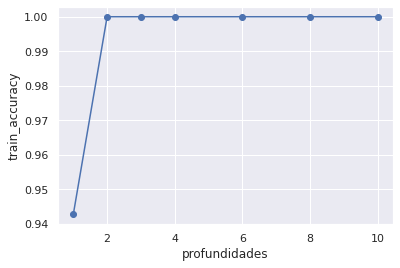

In [36]:
print("Train_Accuracy:  ", train_dt, "\n")
fig, ax = plt.subplots()
ax.scatter(x = [max_d], y = [train_dt])
ax.plot(max_d, train_dt)
plt.xlabel('profundidades')
plt.ylabel('train_accuracy')
plt.show()

###Random Forest

In [37]:
data = dataset_balanceado[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = dataset_balanceado['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

max_d= [2,3,4,7,9,10]
n_es=[50,100,150,200,250,300]
train_dt=[]
a_rf=[]

for md,e in zip(max_d,n_es):
  est = RandomForestClassifier(max_depth=md, n_estimators=e, random_state=21)
  est.fit(X_train,y_train)
  y_predic= est.predict(X_test)
  a1 = accuracy_score(y_predic,y_test)
  t1 = accuracy_score(est.predict(X_train), y_train)
  a_rf.append(a1)
  train_dt.append(t1)
print("Accuracy_Randomforest:  ",a_dt)
forest = a_dt[0]

Accuracy_Randomforest:   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


###Random Forest grafica train_accuracy

Accurarcy_train:   [0.9977973568281938, 1.0, 1.0, 1.0, 1.0, 1.0] 



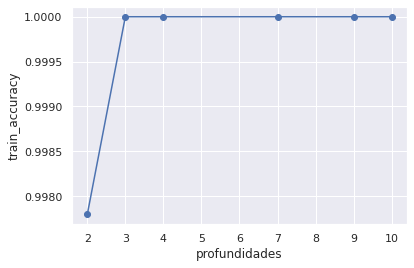

In [38]:
print("Accurarcy_train:  ",train_dt, "\n")
fig, ax = plt.subplots()
ax.scatter(x = [max_d], y = [train_dt])
ax.plot(max_d, train_dt)
plt.xlabel('profundidades')
plt.ylabel('train_accuracy')
plt.show()

###SVM

In [39]:
data = dataset_balanceado[['aluminium','arsenic','barium','cadmium','chloramine','chromium','copper','flouride','lead','nitrates','nitrites','mercury',
                      'perchlorate','selenium','silver','uranium']]
data_y = dataset_balanceado['is_safe']                      

X_train, X_test, y_train, y_test = train_test_split(data,data_y,test_size=0.2, shuffle=False)

kernels =   ['sigmoid', 'linear', 'poly', 'rbf']
a_svc = []
train = []

for kernel in kernels:
      est = SVC(kernel=kernel,random_state=21)
      est.fit(X_train,y_train)
      y_predic = est.predict(X_test)
      t1 = accuracy_score(est.predict(X_train), y_train)
      a = accuracy_score(y_predic,y_test)
      a_svc.append(a)
      train.append(t1)
print("Accuracy_svc:  ",a_svc)
svm = a_svc[2]

Accuracy_svc:   [1.0, 0.0, 1.0, 1.0]


###SVM grafica train_accuracy

Accurarcy_train:   [0.9317180616740088, 0.6255506607929515, 0.8568281938325991, 0.9691629955947136] 



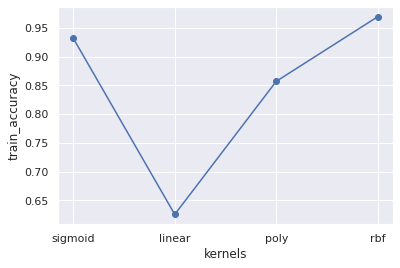

In [40]:
print("Accurarcy_train:  ",train, "\n")
fig, ax = plt.subplots()
ax.scatter(x = kernels, y = [train])
ax.plot(kernels, train)
plt.xlabel('kernels')
plt.ylabel('train_accuracy')
plt.show()

###Comparación de los diversos estimadores

GaussianNB: 1.0 Decision_Tree: 1.0 Random_Forest: 1.0 SVM: 1.0 



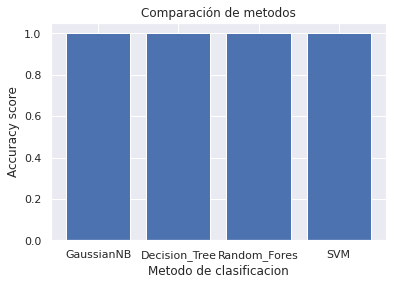

In [41]:
print('GaussianNB:', gauss,'Decision_Tree:',tree, 'Random_Forest:', forest,'SVM:',svm, '\n')
eje_x = ['GaussianNB', 'Decision_Tree', 'Random_Fores', 'SVM']
eje_y = [gauss,tree,forest,svm]
 
plt.bar(eje_x, eje_y)
 
plt.ylabel('Accuracy score')
plt.xlabel('Metodo de clasificacion')
plt.title('Comparación de metodos')
 
plt.show()